In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.circuit import Instruction

from qiskit.tools.visualization import circuit_drawer

## Circuit Creation

### Preperation
Prepares a Bell State. Results in:

$$\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$$

In [2]:
def bell_state(reg0, reg1):
    circuit = QuantumCircuit(reg0, reg1)
    circuit.h(reg0)
    circuit.cx(reg0, reg1)
    return circuit

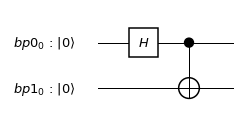

In [3]:
bell_state(QuantumRegister(1, 'bp0'), QuantumRegister(1, 'bp1')).draw(output='mpl')

### Encode
Encodes the message into the first Qubit. This is done via a controlled $X$ (NOT) Gate and $Z$ (Phase) Gate based on the message.

In [13]:
def encode(message_registers, q0):
    circuit = QuantumCircuit(message_registers, q0)
    circuit.cx(message_registers[1], q0)
    circuit.cz(message_registers[0], q0)
    return circuit

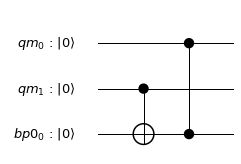

In [14]:
encode(QuantumRegister(2, 'qm'), QuantumRegister(1, 'bp0')).draw(output='mpl')

### Transfer
This swap operation represents a transfer of quantum information from one information system to another.

In [5]:
def transfer(q0, swap):
    circuit = QuantumCircuit(q0, swap)
    circuit.swap(q0, swap)
    return circuit

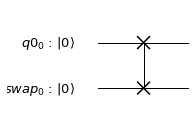

In [6]:
transfer(QuantumRegister(1, 'q0'), QuantumRegister(1, 'swap')).draw(output='mpl')

### Decode
Decode the message using the prepared qubit and the newly arrived qubit.

In [7]:
def decode(q0, q1):
    circuit = QuantumCircuit(q0, q1)
    circuit.cx(q0, q1)
    circuit.h(q0)
    return circuit

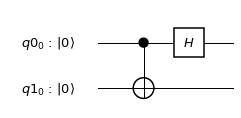

In [8]:
decode(QuantumRegister(1, 'q0'), QuantumRegister(1, 'q1')).draw(output='mpl')

In [15]:
def read(q0, q1, classical_registers):
    circuit = QuantumCircuit(q0, q1, classical_registers)
    circuit.measure(q0[0], classical_registers[0])
    circuit.measure(q1[0], classical_registers[1])
    return circuit

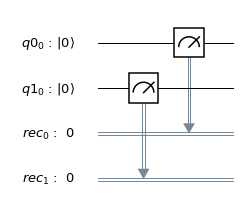

In [16]:
read(QuantumRegister(1, 'q0'), QuantumRegister(1, 'q1'), ClassicalRegister(2, 'rec')).draw(output='mpl')

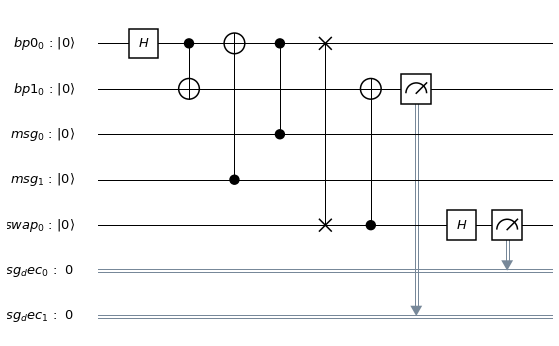

In [23]:
bell_pair_0 = QuantumRegister(1, 'bp0')
bell_pair_1 = QuantumRegister(1, 'bp1')
swap = QuantumRegister(1, 'swap')
message = QuantumRegister(2, 'msg')
output = ClassicalRegister(2, 'msg_dec')

allCircuits = (bell_state(bell_pair_0, bell_pair_1) + 
               encode(message, bell_pair_0) +
               transfer(bell_pair_0, swap) +
               decode(swap, bell_pair_1) +
               read(swap, bell_pair_1, output))

allCircuits.draw(output='mpl')

## Testing

Test that the encoding circuit and the decoding circuit are decoupled from each other using num_tensor_factors to determine the number of subcircuits.

In [31]:
backend_sim = BasicAer.get_backend('qasm_simulator')
for case in ['00', '01', '10', '11']:
    circuit = (allCircuits)

    config = {'initial_state': np.array([0, 0, 1, 0, 0])}
    result = execute(circuit, backend_sim, shots=1, config=config).result()
    counts = result.get_counts(circuit)
    try:
        assert (counts[f"{case}"] == 1)
        print (f"{case} was sent successfully!")
    except:
        print (f"{case} got result {counts}")

00 was sent successfully!
01 got result {'00': 1}
10 got result {'00': 1}
11 got result {'00': 1}
